<a href="https://colab.research.google.com/github/aniket8151/Twitter-sentimental-analysis-/blob/main/sentimentanalysisusingtextblob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey='iL2KI650FefaLUj8X8yh0xKmo'
consumerSecret='bHfmdHDc9wIifVW26Gw9XqAGhpS9XyRAe6HxxWXGzUDtkUf38o'
accessToken='1195745298582106112-EZi82yH3RTahSCBMToXBFlERp7Fxqu'
accessTokenSecret='Fjk9XgOT3y7nug3Z6VXNBQbXrD10HoXRIR52wVdbiGqR7'

In [3]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
#fetching the tweets
#fetching the new tweets
posts= tweepy.Cursor(api.search,q='coronavirus',lang="en").items(200)
i=1
#fetching the old tweets
oldposts=tweepy.Cursor(api.search,q='coronavirus',lang="en", since='2020-04-01').items(200)
#creating a data frame for old and new tweets
for tweet in posts:
    df= pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
    oldf= pd.DataFrame([tweet.text for tweet in oldposts],columns=['Tweets'])


In [5]:
oldf.head()

,Tweets
0,RT @MaitreyaBhakal: I wrote about something th...
1,@j_l_patel @scott13wilson @justin_hart @mcuban...
2,RT @RobThorn36: @Sillyshib You may want to rea...
3,RT @drclairetaylor: @ShamezLadhani How does th...
4,#coronavirus #COVID19 #COVID_19 #Trumpian #Tru...


In [6]:
df.head()


,Tweets
0,@j_l_patel @scott13wilson @justin_hart @mcuban...
1,RT @RobThorn36: @Sillyshib You may want to rea...
2,RT @drclairetaylor: @ShamezLadhani How does th...
3,#coronavirus #COVID19 #COVID_19 #Trumpian #Tru...
4,"Again, for the people in the back of the room!..."


In [7]:
#cleaning the data
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT
    
    return text
#cleaning the new data
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,_l_patel _hart Quite a few did actually. Thi...
1,: You may want to read this which highlights ...
2,: How does that work? They can catch Covid bu...
3,coronavirus COVID19 COVID_19 Trumpian Trump pa...
4,"Again, for the people in the back of the room!..."
...,...
194,_ed Good point.\nThanks.😇\n\n
195,: If you are not wearing a mask you are spread...
196,Regards Sinopharm's inactivated COVID-19 vacci...
197,"My brother in Christ, YOU said masks don’t w..."


In [8]:
#cleaning the old data
oldf['Tweets']=oldf['Tweets'].apply(cleanTxt)
#printing
oldf

,Tweets
0,: I wrote about something that America has for...
1,_l_patel _hart Quite a few did actually. Thi...
2,: You may want to read this which highlights ...
3,: How does that work? They can catch Covid bu...
4,coronavirus COVID19 COVID_19 Trumpian Trump pa...
...,...
195,: Most companies re-open for business as China...
196,_ed Good point.\nThanks.😇\n\n
197,: If you are not wearing a mask you are spread...
198,Regards Sinopharm's inactivated COVID-19 vacci...


In [9]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,_l_patel _hart Quite a few did actually. Thi...,0.200000,-0.100000
1,: You may want to read this which highlights ...,0.500000,0.500000
2,: How does that work? They can catch Covid bu...,0.558201,0.107143
3,coronavirus COVID19 COVID_19 Trumpian Trump pa...,0.100000,0.000000
4,"Again, for the people in the back of the room!...",0.000000,0.000000
...,...,...,...
194,_ed Good point.\nThanks.😇\n\n,0.600000,0.700000
195,: If you are not wearing a mask you are spread...,0.400000,0.000000
196,Regards Sinopharm's inactivated COVID-19 vacci...,0.000000,0.000000
197,"My brother in Christ, YOU said masks don’t w...",0.000000,0.000000


In [10]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,_l_patel _hart Quite a few did actually. Thi...,0.200000,-0.100000,Negative
1,: You may want to read this which highlights ...,0.500000,0.500000,Positive
2,: How does that work? They can catch Covid bu...,0.558201,0.107143,Positive
3,coronavirus COVID19 COVID_19 Trumpian Trump pa...,0.100000,0.000000,Neutral
4,"Again, for the people in the back of the room!...",0.000000,0.000000,Neutral
...,...,...,...,...
194,_ed Good point.\nThanks.😇\n\n,0.600000,0.700000,Positive
195,: If you are not wearing a mask you are spread...,0.400000,0.000000,Neutral
196,Regards Sinopharm's inactivated COVID-19 vacci...,0.000000,0.000000,Neutral
197,"My brother in Christ, YOU said masks don’t w...",0.000000,0.000000,Neutral


In [11]:
oldf['Subjectivity']=oldf['Tweets'].apply(getSubjectivity)
oldf['Polarity']=oldf['Tweets'].apply(getPolarity)

oldf

,Tweets,Subjectivity,Polarity
0,: I wrote about something that America has for...,0.500000,0.500000
1,_l_patel _hart Quite a few did actually. Thi...,0.200000,-0.100000
2,: You may want to read this which highlights ...,0.500000,0.500000
3,: How does that work? They can catch Covid bu...,0.558201,0.107143
4,coronavirus COVID19 COVID_19 Trumpian Trump pa...,0.100000,0.000000
...,...,...,...
195,: Most companies re-open for business as China...,0.500000,0.500000
196,_ed Good point.\nThanks.😇\n\n,0.600000,0.700000
197,: If you are not wearing a mask you are spread...,0.400000,0.000000
198,Regards Sinopharm's inactivated COVID-19 vacci...,0.000000,0.000000


In [12]:
oldf['Analysis']=oldf['Polarity'].apply(getAnalysis)
oldf

,Tweets,Subjectivity,Polarity,Analysis
0,: I wrote about something that America has for...,0.500000,0.500000,Positive
1,_l_patel _hart Quite a few did actually. Thi...,0.200000,-0.100000,Negative
2,: You may want to read this which highlights ...,0.500000,0.500000,Positive
3,: How does that work? They can catch Covid bu...,0.558201,0.107143,Positive
4,coronavirus COVID19 COVID_19 Trumpian Trump pa...,0.100000,0.000000,Neutral
...,...,...,...,...
195,: Most companies re-open for business as China...,0.500000,0.500000,Positive
196,_ed Good point.\nThanks.😇\n\n,0.600000,0.700000,Positive
197,: If you are not wearing a mask you are spread...,0.400000,0.000000,Neutral
198,Regards Sinopharm's inactivated COVID-19 vacci...,0.000000,0.000000,Neutral


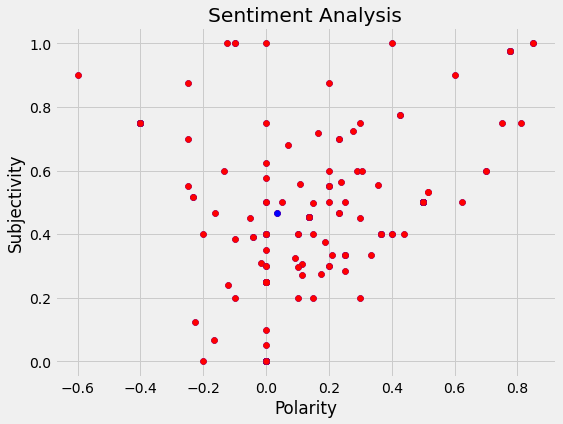

In [13]:
#ploting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
    plt.scatter(oldf['Polarity'][i],oldf['Subjectivity'][i],color='Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [14]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

45.7

In [15]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

15.1

In [16]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

39.2

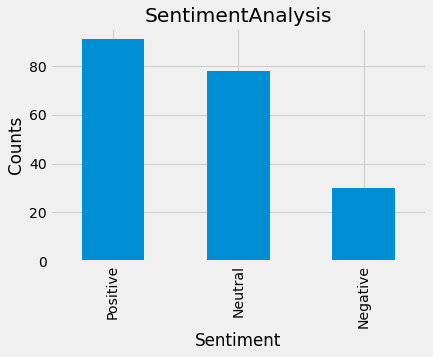

In [17]:
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [18]:
ptweets=oldf[oldf.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/oldf.shape[0])*100,1)

15.0

In [19]:
ptweets=oldf[oldf.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/oldf.shape[0])*100,1)

39.5

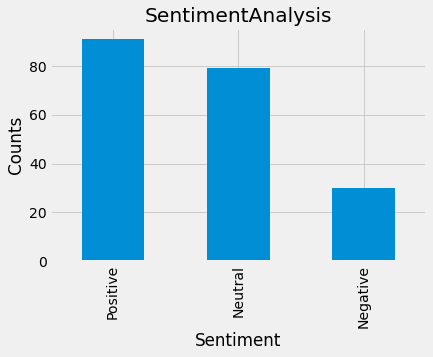

In [20]:
oldf['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
oldf['Analysis'].value_counts().plot(kind='bar')
plt.show()